<a href="https://colab.research.google.com/github/fspanda/FPL-Fantasy-Premier-league-Forecasting/blob/main/Code/Fantasy_League_LSTM_player.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/vaastav/Fantasy-Premier-League.git

Cloning into 'Fantasy-Premier-League'...
remote: Enumerating objects: 5982, done.
remote: Counting objects: 100% (5982/5982), done.
remote: Compressing objects: 100% (3150/3150), done.
remote: Total 119401 (delta 2456), reused 5289 (delta 2329), pack-reused 113419
Receiving objects: 100% (119401/119401), 39.61 MiB | 23.43 MiB/s, done.
Resolving deltas: 100% (55602/55602), done.


In [ ]:
import os

file_list = os.listdir('/content/Fantasy-Premier-League/data/2019-20/players')
file_list

In [5]:
import pandas as pd
first = True
for name in file_list:  


  file=pd.read_csv("/content/Fantasy-Premier-League/data/2019-20/players/{}/gw.csv".format(name))
  file_length=len(file)
  tmp_X=file.drop('total_points',axis=1)

  tmp_Y=file[['total_points']]
  tmp_Y=tmp_Y.drop(0,axis=0)  
  tmp_X=tmp_X.drop(file_length-1,axis=0)
  tmp_X=tmp_X.drop("kickoff_time",axis=1)
  if first:
    first=False
    train_X=tmp_X
    train_Y=tmp_Y
  train_X=pd.concat([train_X,tmp_X])
  train_Y=pd.concat([train_Y,tmp_Y])




In [6]:
train_X_t=train_X.values
train_Y_t=train_Y.values
train_X_t = train_X_t.reshape(train_X.shape[0], train_X.shape[1] , 1)
train_X_t=train_X_t.astype(float)
train_Y_t=train_Y.astype(float)

In [7]:
train_X.shape

(21873, 29)

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_X_t, train_Y_t, test_size=0.1) 

In [11]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential() # Sequeatial Model 
model.add(LSTM(200, input_shape=(29, 1))) # (timestep, feature) 

model.add(Dense(1)) # output = 1
model.compile(optimizer='adam', loss='mse',metrics=['mse'])
model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [14]:
es = EarlyStopping(monitor='val_mse', mode='min', verbose=1, patience=5)

checkpoint_path='/content/drive/MyDrive/dacon/Fantasy_league/LSTM_train_model.h5'
mc = ModelCheckpoint(checkpoint_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

history=model.fit(x_train,y_train, epochs=100, batch_size=30, verbose=1, callbacks=[mc,es],validation_split=0.1)



Epoch 1/100
591/591 [==============================] - 3s 5ms/step - loss: 4.8984 - mse: 4.8984 - val_loss: 4.3114 - val_mse: 4.3114

Epoch 00001: val_loss improved from inf to 4.31143, saving model to /content/drive/MyDrive/dacon/Fantasy_league/LSTM_train_model.h5
Epoch 2/100
591/591 [==============================] - 3s 5ms/step - loss: 4.8824 - mse: 4.8824 - val_loss: 4.3327 - val_mse: 4.3327

Epoch 00002: val_loss did not improve from 4.31143
Epoch 3/100
591/591 [==============================] - 3s 5ms/step - loss: 4.8503 - mse: 4.8503 - val_loss: 4.3511 - val_mse: 4.3511

Epoch 00003: val_loss did not improve from 4.31143
Epoch 4/100
591/591 [==============================] - 3s 5ms/step - loss: 4.8155 - mse: 4.8155 - val_loss: 4.4286 - val_mse: 4.4286

Epoch 00004: val_loss did not improve from 4.31143
Epoch 5/100
591/591 [==============================] - 3s 5ms/step - loss: 4.7674 - mse: 4.7674 - val_loss: 4.1791 - val_mse: 4.1791

Epoch 00005: val_loss improved from 4.31143 t

In [20]:
predict=model.predict(x_test)

In [19]:
y_test

,total_points
25,0.0
19,7.0
20,2.0
25,1.0
35,1.0
...,...
16,1.0
35,7.0
35,0.0
25,0.0


In [21]:
test_mse_score = model.evaluate(x_test, y_test)

69/69 [==============================] - 0s 3ms/step - loss: 4.1468 - mse: 4.1468


In [23]:
test_mse_score

4.146814346313477

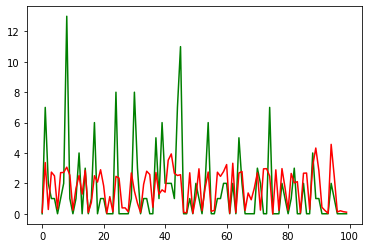

In [26]:

from matplotlib import pyplot as plt
#x=list(range(len(train_Y_t)))
st=0
num=100
x=list(range(st,num))
plt.plot(x,y_test[st:num],color="green")
plt.plot(x,predict[st:num],color="red")
plt.show()

